In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import wrangle
import matplotlib.pyplot as plt



In [2]:
df = wrangle.wrangle_logs()

In [3]:
df.head()

,date,time,page,id,cohort,ip,start_date,end_date,program_id,active
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,2015-09-22,2016-02-06,1.0,0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,2015-09-22,2016-02-06,1.0,0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,2015-09-22,2016-02-06,1.0,0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,2015-09-22,2016-02-06,1.0,0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2018-01-08,2018-05-17,2.0,1


In [16]:
web = df[df.program_id != 3]
ds = df[df.program_id == 3]

# 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?


In [17]:
# program 3 is datascience, programs 1,2 & 4 are webdev
# check webdev first:
web.page.value_counts().head(10)

/                           41955
javascript-i                18973
toc                         18286
search/search_index.json    17316
java-iii                    13729
html-css                    13619
java-ii                     12681
spring                      12518
jquery                      11521
mysql                       11024
Name: page, dtype: int64

#### Top lesson for web dev is Javascript-i

In [18]:
ds.page.value_counts().head(10)

/                                           8358
search/search_index.json                    2203
classification/overview                     1785
1-fundamentals/modern-data-scientist.jpg    1655
1-fundamentals/AI-ML-DL-timeline.jpg        1651
1-fundamentals/1.1-intro-to-data-science    1633
classification/scale_features_or_not.svg    1590
fundamentals/AI-ML-DL-timeline.jpg          1443
fundamentals/modern-data-scientist.jpg      1438
sql/mysql-overview                          1424
Name: page, dtype: int64

#### Top lesson for Data Science is The Classification overview

# 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?


,,,,,,,,0
date,time,id,ip,start_date,end_date,program_id,active,
1,1,1,1,1,1,1,1,2949
2,2,2,2,2,2,2,2,1369
3,3,3,3,3,3,3,3,825
4,4,4,4,4,4,4,4,595
5,5,5,5,5,5,5,5,449
...,...,...,...,...,...,...,...,...
528,528,528,528,528,528,528,528,1
533,533,533,533,533,533,533,533,1
534,534,534,534,534,534,534,534,1


,date,time,page,id,cohort,ip,start_date,end_date,program_id,active
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,2015-09-22,2016-02-06,1.0,0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,2015-09-22,2016-02-06,1.0,0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,2015-09-22,2016-02-06,1.0,0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2018-01-08,2018-05-17,2.0,1
5,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,2018-01-08,2018-05-17,2.0,1
...,...,...,...,...,...,...,...,...,...,...
900218,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,2014-02-04,2014-02-04,2.0,0
900219,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,2014-02-04,2014-02-04,2.0,0
900220,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,2014-02-04,2014-02-04,2.0,0
900221,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,2014-02-04,2014-02-04,2.0,0


In [69]:
counts = pd.DataFrame(web.groupby(['page','cohort'])['date'].count()).sort_values('date', ascending=False)

In [98]:
page_given_cohort = (
    web.groupby('cohort')
    .page.value_counts(normalize=True)
    .rename('proba_page_given_cohort')
    .reset_index()
).sort_values('proba_page_given_cohort', ascending=False)


In [99]:
page_given_cohort

,cohort,page,proba_page_given_cohort
848,9.0,content/html-css,0.500000
384,4.0,prework/databases,0.333333
385,4.0,prework/versioning/github,0.333333
383,4.0,mkdocs/search_index.json,0.333333
850,9.0,content/html-css/introduction.html,0.250000
...,...,...,...
7261,28.0,slides/form,0.000013
7260,28.0,slides/console_io,0.000013
7259,28.0,slides/array-lists,0.000013
7258,28.0,servlets,0.000013


In [59]:
page_given_cohort[page_given_cohort.page == 'spring'].head()

,cohort,page,page_given_cohort
5923,28.0,spring,1403
3577,22.0,spring,744
7331,29.0,spring,672
4531,24.0,spring,650
9204,53.0,spring,636


#### In WebDev cohort 28's pageviews for spring were nearly double that of the next highest cohort

# 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [101]:
active = df[df.active == 1]

In [107]:
active.id.value_counts().tail(40)

978    55
46     54
543    53
56     52
960    48
964    45
971    44
371    42
981    42
959    41
967    41
529    36
973    35
972    34
976    29
41     28
24     26
772    26
64     25
49     25
961    20
340    18
963    18
968    17
487    17
889    16
697    13
572    12
941    12
679    11
388     8
812     7
956     6
539     5
278     4
832     3
879     1
940     1
918     1
619     1
Name: id, dtype: int64

In [115]:
df.id.value_counts().tail(40)

107    8
388    8
104    8
401    7
115    6
956    6
152    5
169    5
399    5
82     5
71     5
85     4
857    4
216    4
246    4
62     4
980    3
832    3
81     3
89     3
348    3
176    3
177    3
852    2
97     2
573    2
574    2
649    1
940    1
165    1
879    1
652    1
592    1
619    1
593    1
66     1
163    1
918    1
212    1
952    1
Name: id, dtype: int64

In [119]:
df[df.id == 388]

,date,time,page,id,cohort,ip,start_date,end_date,program_id,active
221780,2019-03-19,09:50:19,/,388,31.0,97.105.19.58,2019-03-18,2019-07-30,2.0,1
221782,2019-03-19,09:50:23,html-css,388,31.0,97.105.19.58,2019-03-18,2019-07-30,2.0,1
221784,2019-03-19,09:50:28,html-css/elements,388,31.0,97.105.19.58,2019-03-18,2019-07-30,2.0,1
221827,2019-03-19,10:04:11,html-css/elements,388,31.0,97.105.19.58,2019-03-18,2019-07-30,2.0,1
221841,2019-03-19,10:19:32,html-css/elements,388,31.0,97.105.19.58,2019-03-18,2019-07-30,2.0,1
221951,2019-03-19,11:11:51,html-css/forms,388,31.0,97.105.19.58,2019-03-18,2019-07-30,2.0,1
221952,2019-03-19,11:12:02,html-css/elements,388,31.0,97.105.19.58,2019-03-18,2019-07-30,2.0,1
222154,2019-03-19,12:19:23,html-css/elements,388,31.0,97.105.19.58,2019-03-18,2019-07-30,2.0,1


#### The 20 active students who accessed the curriculum the least accessed curriculum on their cohort's start date, possibly for a few days after, and then do not access again.  They also do not have any access attempts while inactive.

# 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?


In [195]:
def compute_pct_b(pages, span, weight, user):
    midband = pages.ewm(span=span).mean()
    stdev = pages.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    bb = pd.concat([ub, lb], axis=1)
    my_df = pd.concat([pages, midband, bb], axis=1)
    my_df.columns = ['pages', 'midband', 'ub', 'lb']
    my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

def prep(df, user):
    df = df[df.id == user]
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    pages = df['page'].resample('d').count()
    return pages

def plt_bands(my_df, user):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

def find_anom(df, user, span, weight):
    pages = prep(df, user)
    my_df = compute_pct_b(pages, span, weight, user)
    # plt_bands(my_df, user)
    return my_df[my_df.pct_b>1]

In [201]:
span = 30
weight = 3.5
anom = pd.DataFrame()
for u in list(df.id.unique()):
    user_df = find_anom(df, u, span, weight)
    anom = pd.concat([anom, user_df], axis=0)

In [212]:
views = anom.pages.value_counts().index

In [214]:
sorted(views)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 64,
 65,
 66,
 67,
 69,
 72,
 73,
 74,
 75,
 76,
 78,
 81,
 82,
 84,
 89,
 93,
 94,
 95,
 96,
 99,
 101,
 104,
 107,
 108,
 109,
 113,
 116,
 117,
 122,
 128,
 129,
 146,
 153,
 165,
 179,
 192,
 198,
 272]

In [215]:
anom[anom.pages == 272]

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2019-03-03,272,24.721632,266.780128,-217.336864,1.010782,341


In [223]:
df[(df.id == 272) & (df.active==1)]

,date,time,page,id,cohort,ip,start_date,end_date,program_id,active
125708,2018-09-17,14:21:28,/,272,26.0,97.105.19.58,2018-09-17,2019-02-08,2.0,1
125758,2018-09-17,14:39:30,toc,272,26.0,97.105.19.58,2018-09-17,2019-02-08,2.0,1
126045,2018-09-18,08:50:58,toc,272,26.0,97.105.19.58,2018-09-17,2019-02-08,2.0,1
126057,2018-09-18,08:57:48,html-css/introduction,272,26.0,97.105.19.58,2018-09-17,2019-02-08,2.0,1
126061,2018-09-18,09:00:07,html-css/elements,272,26.0,97.105.19.58,2018-09-17,2019-02-08,2.0,1
...,...,...,...,...,...,...,...,...,...,...
190338,2019-02-04,08:29:38,java-iii/jsp-and-jstl,272,26.0,67.11.215.97,2018-09-17,2019-02-08,2.0,1
190379,2019-02-04,09:04:55,spring/fundamentals/security/authentication,272,26.0,107.77.169.3,2018-09-17,2019-02-08,2.0,1
190433,2019-02-04,09:23:35,spring/fundamentals/repositories,272,26.0,107.77.169.3,2018-09-17,2019-02-08,2.0,1
190821,2019-02-04,16:15:51,spring/fundamentals/repositories,272,26.0,97.105.19.58,2018-09-17,2019-02-08,2.0,1


<AxesSubplot:xlabel='date'>

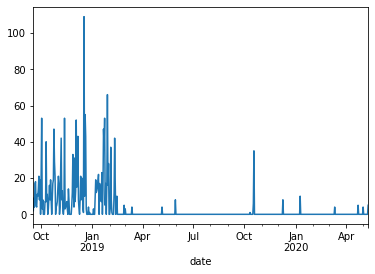

In [221]:
df[df.id==272].set_index('date').page.resample('d').count().plot()

#### User 272 graduated in Feb 2019 and continued to access pages occaisionally afterwareds, but nothing too strange

# 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?


In [242]:
ds_ids = ds.id.unique()
web_ids = web.id.unique()

In [245]:
both = list(set(ds_ids).intersection(web_ids))

In [249]:
both_df = df[df.id.isin(both)].set_index('date')

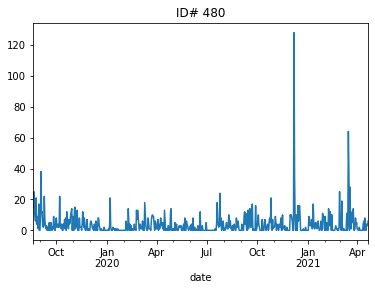

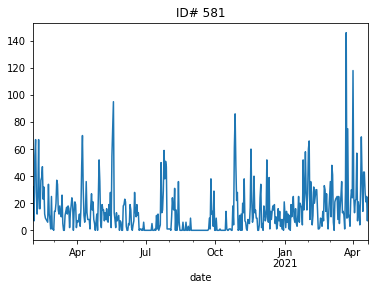

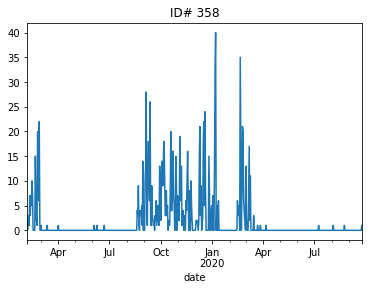

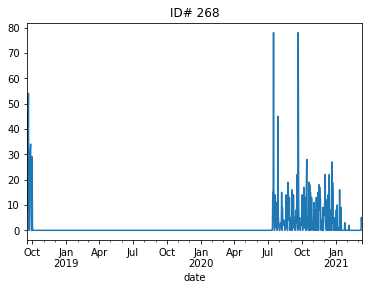

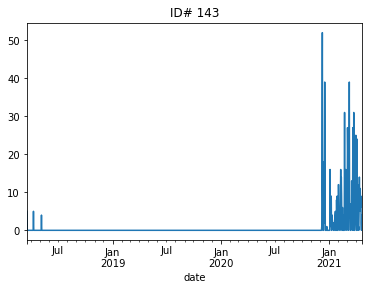

In [252]:
for ids in both:
    both_df[both_df.id == ids].page.resample('d').count().plot()
    plt.title(f'ID# {ids}')
    plt.show()
    

In [253]:
both_df

,time,page,id,cohort,ip,start_date,end_date,program_id,active
date,,,,,,,,,
2018-03-18,15:24:59,index.html,143,16.0,173.174.192.127,2016-10-26,2017-03-09,2.0,0
2018-03-18,15:25:01,mysql,143,16.0,173.174.192.127,2016-10-26,2017-03-09,2.0,0
2018-03-18,15:25:04,mysql/introduction,143,16.0,173.174.192.127,2016-10-26,2017-03-09,2.0,0
2018-03-18,15:25:05,mysql/users,143,16.0,173.174.192.127,2016-10-26,2017-03-09,2.0,0
2018-03-18,15:25:07,mysql/introduction,143,16.0,173.174.192.127,2016-10-26,2017-03-09,2.0,0
...,...,...,...,...,...,...,...,...,...
2021-04-21,11:09:42,python/advanced-dataframes,581,28.0,70.112.179.142,2014-02-04,2014-02-04,2.0,0
2021-04-21,11:13:36,python/dataframes,480,28.0,75.1.166.163,2014-02-04,2014-02-04,2.0,0
2021-04-21,11:13:39,python/series,480,28.0,75.1.166.163,2014-02-04,2014-02-04,2.0,0


# 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?


In [234]:
inactive[inactive.program_id != 3].page.value_counts()

/                                                               18547
javascript-i                                                     5745
search/search_index.json                                         5666
spring                                                           4902
html-css                                                         4186
                                                                ...  
users/913                                                           1
bayes-capstones/html                                                1
bayes-capstones                                                     1
content/examples/php/arithmetic.php                                 1
appendix/professional-development/post-interview-review-form        1
Name: page, Length: 1925, dtype: int64

#### For webdev the most common topics for graduates to reference are Javascript-i and springm

In [238]:
inactive[inactive.program_id == 3].page.value_counts()

/                                           1436
search/search_index.json                     493
sql/mysql-overview                           275
classification/overview                      266
classification/scale_features_or_not.svg     219
                                            ... 
DataToAction_v2.jpg                            1
advanced-topics/tidy-data                      1
10-anomaly-detection/isolation-forests         1
cli/moving-files                               1
individual-project/individual-project          1
Name: page, Length: 437, dtype: int64

#### For Data Science the most common topics for graduates to reference are sql and classification

# 7. Which lessons are least accessed? 


In [230]:
df.page.value_counts().tail

5-stats/2.1-probability_and_event_interactions                  1
DataSets_SaaSCustomerChurn                                      1
8_ts_split                                                      1
merge_Ensemble                                                  1
python/custom-sorting-functions                                 1
                                                               ..
javascript/loops                                                1
content/control-structures-ii                                   1
javascript-ii/promisesdfghjkjhgfs                               1
app                                                             1
appendix/professional-development/post-interview-review-form    1
Name: page, Length: 100, dtype: int64